In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from scipy import stats
import statsmodels.api as sm


In [2]:
df_sd0 = pd.read_csv('sdlist.csv')
df_sd0.head(5)
#first 5 rows of origin dataset

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20211023135547,2021-10-23,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20211023135547,2021-10-23,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,4.93,4.83,4.83,NaN,f,5,5,0,0,0.52
2,38245,https://www.airbnb.com/rooms/38245,20211023135547,2021-10-24,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,4.79,4.61,4.40,NaN,f,3,0,3,0,1.44
3,39516,https://www.airbnb.com/rooms/39516,20211023135547,2021-10-24,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"We love our eclectic neighborhood, with a smal...",https://a0.muscache.com/pictures/2ee5c482-c48f...,169649,https://www.airbnb.com/users/show/169649,...,4.96,4.90,4.94,NaN,f,1,1,0,0,3.35
4,54001,https://www.airbnb.com/rooms/54001,20211023135547,2021-10-23,"La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.","Separate charming cottage behind main home, 2 ...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,https://www.airbnb.com/users/show/252692,...,4.97,4.97,4.89,NaN,f,2,1,1,0,5.43


In [3]:
#df_sd0.info()
df_sd0.shape

(9888, 74)

In [4]:
df_sd1 = df_sd0[['host_is_superhost', 
                 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights', 
                 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'price']]

In [5]:
df_sd1.info()#after first selection of predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            9884 non-null   object 
 1   room_type                    9888 non-null   object 
 2   accommodates                 9888 non-null   int64  
 3   bathrooms_text               9883 non-null   object 
 4   bedrooms                     8885 non-null   float64
 5   beds                         9812 non-null   float64
 6   minimum_nights               9888 non-null   int64  
 7   number_of_reviews            9888 non-null   int64  
 8   review_scores_rating         8558 non-null   float64
 9   review_scores_accuracy       8531 non-null   float64
 10  review_scores_cleanliness    8531 non-null   float64
 11  review_scores_checkin        8529 non-null   float64
 12  review_scores_communication  8531 non-null   float64
 13  review_scores_loca

In [6]:
df_sd1.price = df_sd1.price.replace('[\$,]', '', regex=True).astype(float)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df_sd1.isnull().sum()
#check the null value in dataset

host_is_superhost                 4
room_type                         0
accommodates                      0
bathrooms_text                    5
bedrooms                       1003
beds                             76
minimum_nights                    0
number_of_reviews                 0
review_scores_rating           1330
review_scores_accuracy         1357
review_scores_cleanliness      1357
review_scores_checkin          1359
review_scores_communication    1357
review_scores_location         1359
review_scores_value            1359
price                             0
dtype: int64

In [8]:
df_sd1.describe()
#summary statistics for numerical columns

,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,9888.000000,8885.000000,9812.000000,9888.000000,9888.000000,8558.000000,8531.000000,8531.000000,8529.000000,8531.000000,8529.000000,8529.000000,9888.000000
mean,4.833738,1.958694,2.613840,6.898867,53.479066,4.736462,4.793430,4.750509,4.866563,4.854979,4.840118,4.685235,267.728155
std,3.167657,1.223818,2.118973,25.011588,83.349828,0.440885,0.360953,0.369474,0.309973,0.320991,0.303255,0.387812,642.474887
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,3.000000,4.670000,4.750000,4.670000,4.860000,4.840000,4.810000,4.610000,106.000000
50%,4.000000,2.000000,2.000000,2.000000,18.000000,4.850000,4.900000,4.860000,4.950000,4.950000,4.920000,4.780000,165.000000
75%,6.000000,3.000000,3.000000,3.000000,67.000000,4.960000,4.990000,4.970000,5.000000,5.000000,5.000000,4.900000,295.000000
max,16.000000,12.000000,56.000000,999.000000,845.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,24999.000000


In [9]:
df_sd2 = df_sd1.dropna(subset=['review_scores_value', 'host_is_superhost','beds'])
#remove null value of these three columns
df_sd3 = df_sd2.fillna(0)#fill the null value
df_sd3.isnull().sum()
#check if there is null value 

host_is_superhost              0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
minimum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
price                          0
dtype: int64

In [10]:
df_sd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 1 to 9835
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            8503 non-null   object 
 1   room_type                    8503 non-null   object 
 2   accommodates                 8503 non-null   int64  
 3   bathrooms_text               8503 non-null   object 
 4   bedrooms                     8503 non-null   float64
 5   beds                         8503 non-null   float64
 6   minimum_nights               8503 non-null   int64  
 7   number_of_reviews            8503 non-null   int64  
 8   review_scores_rating         8503 non-null   float64
 9   review_scores_accuracy       8503 non-null   float64
 10  review_scores_cleanliness    8503 non-null   float64
 11  review_scores_checkin        8503 non-null   float64
 12  review_scores_communication  8503 non-null   float64
 13  review_scores_loca

In [11]:
df_sd3.host_is_superhost.unique()#check unique value in columns

array(['f', 't'], dtype=object)

In [12]:
df_sd3.room_type.unique()#check unique value in columns

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [13]:
le = LabelEncoder()
categorical_col = ['host_is_superhost']
for column in categorical_col:
    df_sd3[column] = le.fit_transform(df_sd3[column])#label the string value

In [14]:
df_sd3.bathrooms_text.unique()

array(['2 baths', '1 shared bath', '1 bath', '1 private bath',
       '2.5 baths', '2 shared baths', '3 baths', '1.5 baths', '4 baths',
       '3.5 baths', '1.5 shared baths', 'Shared half-bath',
       '3 shared baths', 'Half-bath', '5.5 baths', 0, '4.5 baths',
       '5 baths', '8 baths', '0 baths', '2.5 shared baths',
       '0 shared baths', 'Private half-bath', '6.5 baths', '6 baths',
       '7 baths', '9 baths', '27.5 baths', '7.5 baths', '5 shared baths',
       '4.5 shared baths', '8 shared baths', '3.5 shared baths',
       '10 baths', '4 shared baths', '6 shared baths', '6.5 shared baths'],
      dtype=object)

In [15]:
map_dict = {'2 baths':2, '1 shared bath':1, '1 bath':1, '1 private bath':1,
       '2.5 baths':2.5, '2 shared baths':2, '3 baths':3, '1.5 baths':1.5, '4 baths':4,
       '3.5 baths':3.5, '1.5 shared baths':1.5, 'Shared half-bath':0.5,
       '3 shared baths':3, 'Half-bath':0.5,'5.5 baths':5.5, 0:0, '4.5 baths':4.5,
       '5 baths':5, '8 baths':8, '0 baths':0, '2.5 shared baths':2.5,
       '0 shared baths':0, 'Private half-bath':0.5, '6.5 baths':6.5, '6 baths':6,
       '7 baths':7, '9 baths':9, '27.5 baths':27.5, '7.5 baths':7.5,'5 shared baths':5,
       '4.5 shared baths':4.5, '8 shared baths':8, '3.5 shared baths':3.5,
       '10 baths':10, '4 shared baths':4, '6 shared baths':6, '6.5 shared baths':6.5}
#create a dictonary for the string in bathroom columns

In [16]:
df_sd3["bathrooms"] = df_sd3["bathrooms_text"].map(map_dict)
#map the string of number and create a new numerical columns
df_sd3 = df_sd3.drop('bathrooms_text', axis=1)#drop original string columns
df_sd3.info()#check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 1 to 9835
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            8503 non-null   int64  
 1   room_type                    8503 non-null   object 
 2   accommodates                 8503 non-null   int64  
 3   bedrooms                     8503 non-null   float64
 4   beds                         8503 non-null   float64
 5   minimum_nights               8503 non-null   int64  
 6   number_of_reviews            8503 non-null   int64  
 7   review_scores_rating         8503 non-null   float64
 8   review_scores_accuracy       8503 non-null   float64
 9   review_scores_cleanliness    8503 non-null   float64
 10  review_scores_checkin        8503 non-null   float64
 11  review_scores_communication  8503 non-null   float64
 12  review_scores_location       8503 non-null   float64
 13  review_scores_valu

In [17]:
df_sd3.host_is_superhost.value_counts()
#0 for f
#1 for t

0    4351
1    4152
Name: host_is_superhost, dtype: int64

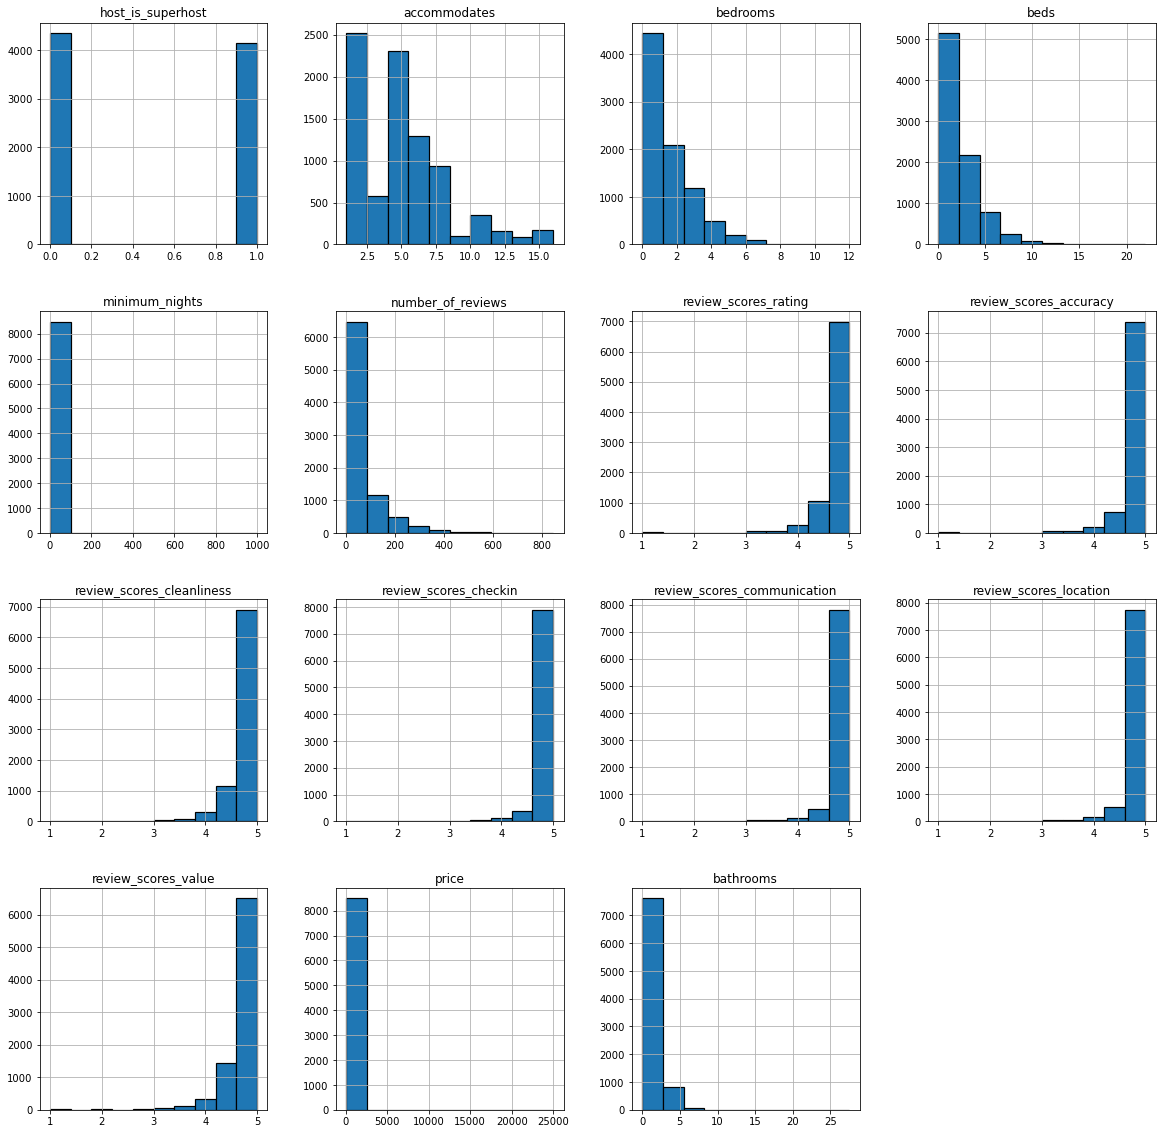

In [18]:
df_sd3.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()#show overall distribution of all predictors

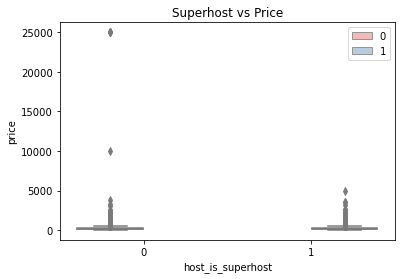

In [19]:
sns.boxplot( x="host_is_superhost", y="price", data=df_sd3, hue='host_is_superhost', palette="Pastel1")
plt.legend(loc='upper right')
plt.title("Superhost vs Price")
plt.show()
#a boxplot for comparison

In [20]:
df_sd2.host_is_superhost.value_counts ()
#check how many listings belong to of superhosts and other hosts

f    4351
t    4152
Name: host_is_superhost, dtype: int64

In [21]:
df_sd2.room_type.value_counts ()
#check type of room

Entire home/apt    7065
Private room       1373
Shared room          57
Hotel room            8
Name: room_type, dtype: int64

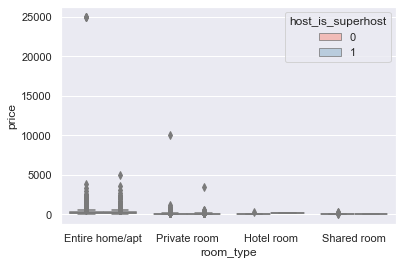

In [22]:
sns.set(style="darkgrid")
sns.boxplot(x="room_type", y="price", hue="host_is_superhost", data=df_sd3, palette="Pastel1")

plt.show()

In [23]:
df_sd3.sort_values(['price'],ascending=False).groupby(['room_type','host_is_superhost']).head(2)
#check the highest price for different group

,host_is_superhost,room_type,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bathrooms
7764,0,Entire home/apt,13,5.0,10.0,3,1,5.00,4.00,5.00,5.00,5.00,5.00,5.00,24999.0,6.0
8504,0,Entire home/apt,6,3.0,4.0,3,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,24999.0,3.0
4041,0,Private room,2,1.0,1.0,2,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10000.0,1.0
2471,1,Entire home/apt,12,6.0,10.0,3,27,5.00,4.96,4.85,4.89,4.85,5.00,4.41,5000.0,7.5
1539,1,Entire home/apt,8,2.0,5.0,3,58,4.67,4.63,4.75,4.84,4.82,4.91,4.61,3570.0,2.0
3760,1,Private room,4,2.0,2.0,1,160,4.90,4.97,4.78,4.92,4.98,4.99,4.86,3500.0,2.0
3220,0,Private room,9,3.0,5.0,5,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1250.0,3.0
7504,1,Private room,6,2.0,4.0,2,9,4.89,4.67,5.00,5.00,5.00,5.00,4.67,550.0,2.0
1357,0,Shared room,1,1.0,1.0,1,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,300.0,1.0
4428,0,Shared room,16,1.0,5.0,2,5,4.50,4.25,4.00,5.00,4.75,3.50,4.25,257.0,3.0


In [24]:
#drop the outliers
df_sd4 = df_sd3[(df_sd3.price != 24999.0)]
df_sd5 = df_sd4[(df_sd4.price < 5000.0)]

In [25]:
df_sd5.shape

(8497, 16)

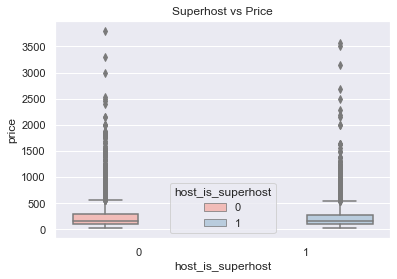

In [26]:
sns.set(style="darkgrid")
sns.boxplot(x="host_is_superhost", y="price", hue="host_is_superhost", data=df_sd5, palette="Pastel1")
plt.title("Superhost vs Price")

plt.show()
#boxplot

In [27]:
#remove all equal to and above 2000 for better comparison
df_sd6 = df_sd5[(df_sd5.price < 2000.0)]

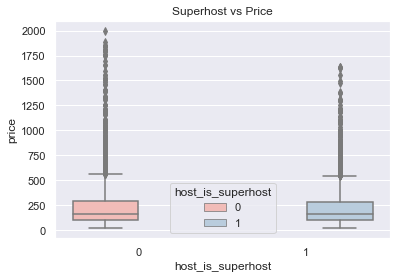

In [28]:
sns.set(style="darkgrid")
sns.boxplot(x="host_is_superhost", y="price", hue="host_is_superhost", data=df_sd6, palette="Pastel1")
plt.title("Superhost vs Price")

plt.show()

In [29]:
df_sd6.room_type.value_counts()

Entire home/apt    7039
Private room       1371
Shared room          57
Hotel room            8
Name: room_type, dtype: int64

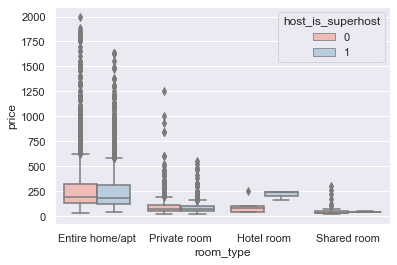

In [30]:
sns.set(style="darkgrid")
sns.boxplot(x="room_type", y="price", hue="host_is_superhost", data=df_sd6, palette="Pastel1")
    
plt.show()

In [31]:
le = LabelEncoder()
categorical_col = ['room_type']
for column in categorical_col:
    df_sd6[column] = le.fit_transform(df_sd6[column])
#label the room type to 
#0:Entire home/apt
#1:Hotel room
#2:Private room
#3:Shared room

/var/folders/7r/ljvj9tsn5n130b8vbpxcyjl00000gn/T/ipykernel_59440/946232295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd6[column] = le.fit_transform(df_sd6[column])


In [32]:
df_sd6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 1 to 9835
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            8475 non-null   int64  
 1   room_type                    8475 non-null   int64  
 2   accommodates                 8475 non-null   int64  
 3   bedrooms                     8475 non-null   float64
 4   beds                         8475 non-null   float64
 5   minimum_nights               8475 non-null   int64  
 6   number_of_reviews            8475 non-null   int64  
 7   review_scores_rating         8475 non-null   float64
 8   review_scores_accuracy       8475 non-null   float64
 9   review_scores_cleanliness    8475 non-null   float64
 10  review_scores_checkin        8475 non-null   float64
 11  review_scores_communication  8475 non-null   float64
 12  review_scores_location       8475 non-null   float64
 13  review_scores_valu

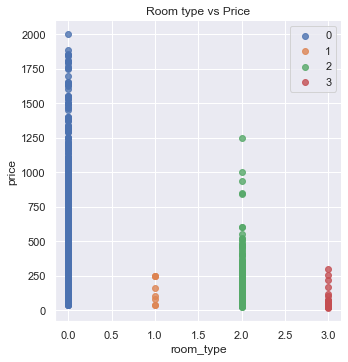

In [33]:
sns.lmplot( x="room_type", y="price", data=df_sd6, fit_reg=False, hue='room_type', legend=False)
plt.legend(loc='upper right')
plt.title("Room type vs Price")
plt.show()
#0:Entire home/apt
#1:Hotel room
#2:Private room
#3:Shared room
#scatter point of price for four room types

In [34]:
#Construct a dataframe that contain price less than $2000
df_sd_m1 = df_sd6[['host_is_superhost','room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 
                 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'price']]

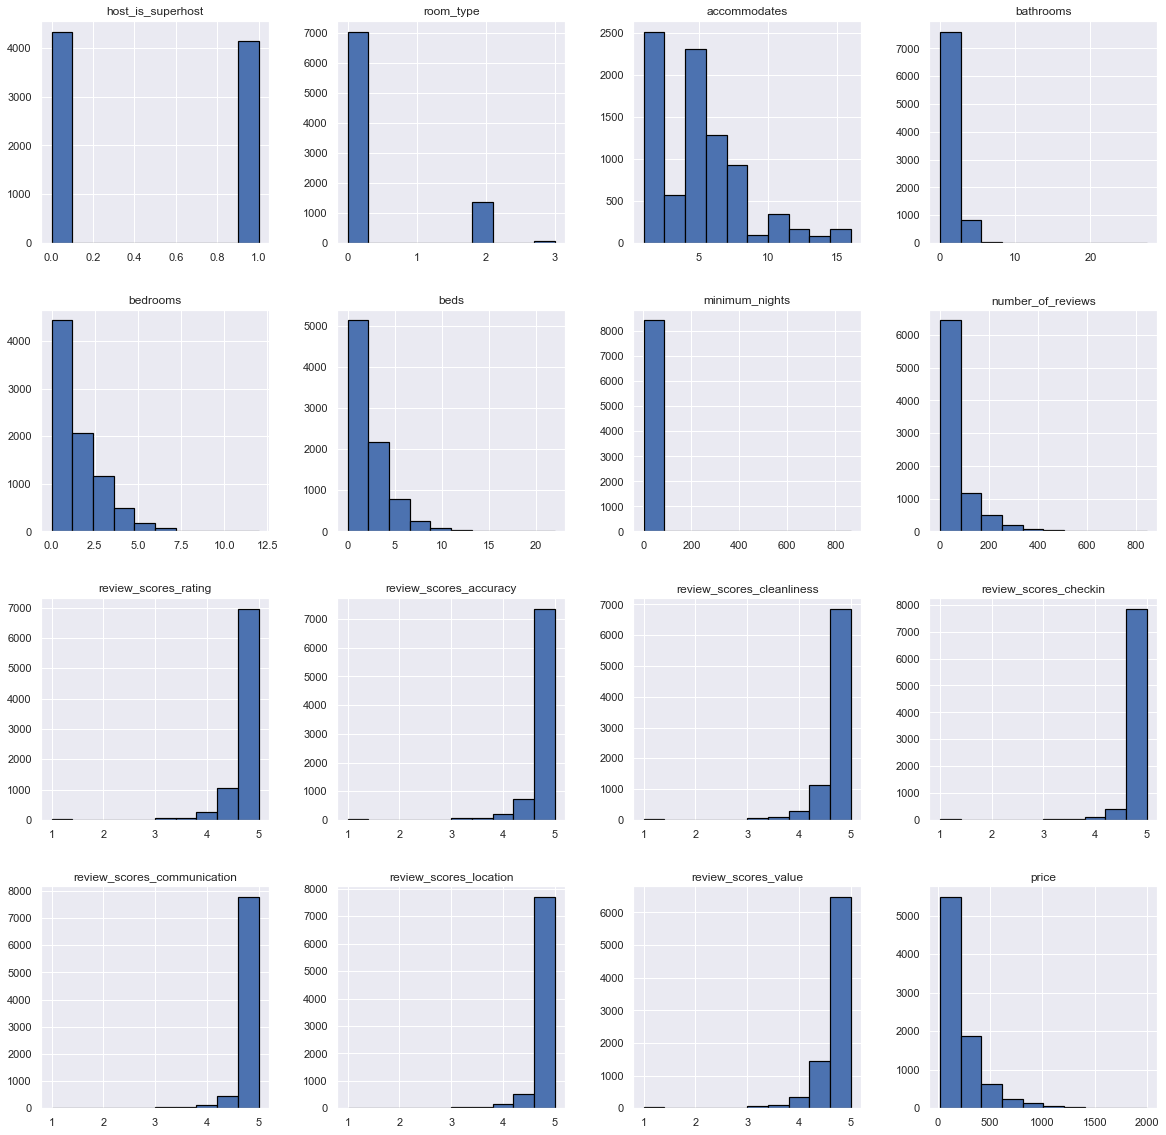

In [35]:
df_sd_m1.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()
#check distribution again

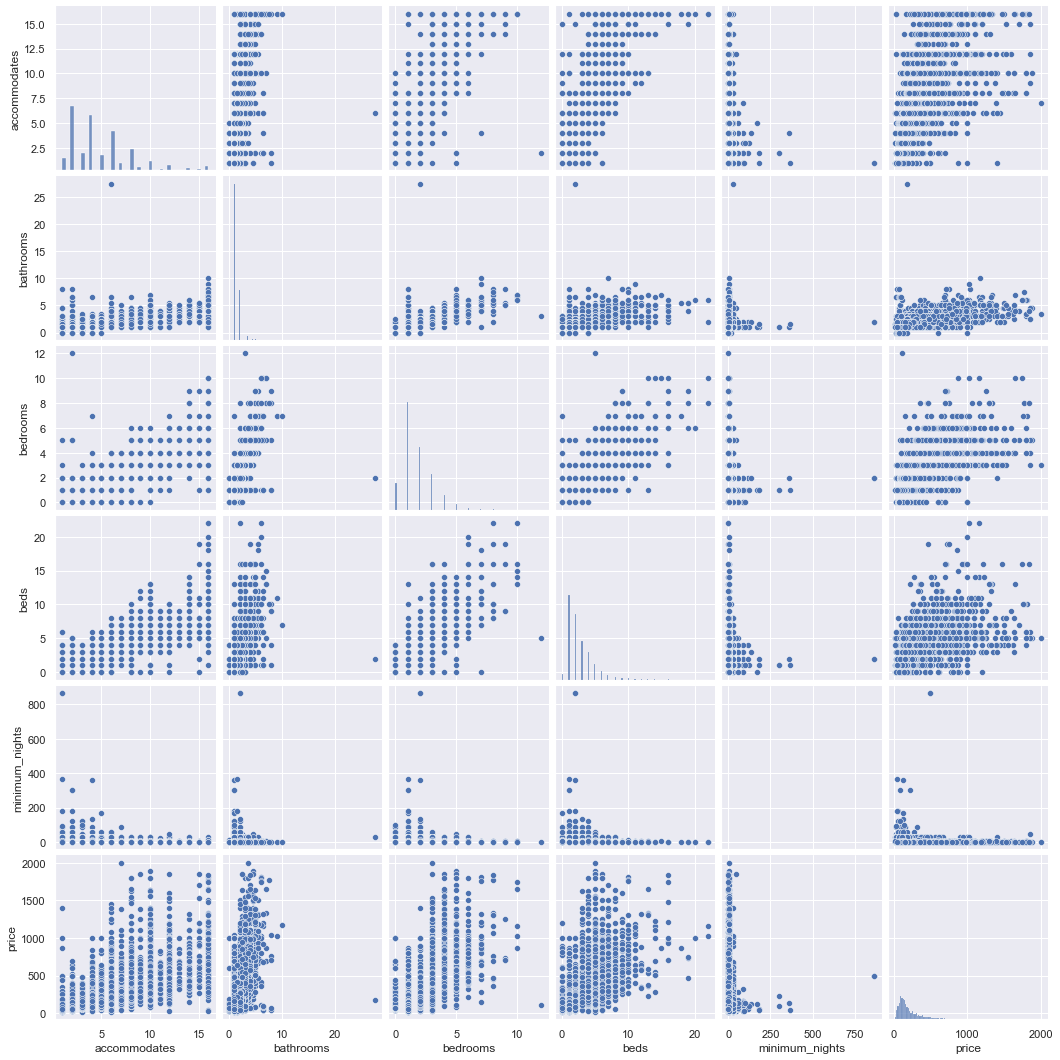

In [36]:
sns.pairplot(df_sd_m1, vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'price'])
plt.scatter
plt.show()
#check the relation by scatterpoint of each of the feature

In [37]:
df_sd_m2 = df_sd_m1[(df_sd_m1.bathrooms < 20)]
df_sd_m2 = df_sd_m2[(df_sd_m2.minimum_nights < 600)]
#remove outlier observe from above graph

In [38]:
df_sd_m2 = df_sd_m2.reset_index(drop=True)
#reset the index and drop the original index

In [39]:
df_sd_m2.head(5)

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,0,0,8,2.0,2.0,3.0,4,71,4.85,4.85,4.69,4.95,4.93,4.83,4.83,225.0
1,0,2,1,1.0,1.0,1.0,1,146,4.32,4.35,4.21,4.71,4.79,4.61,4.40,74.0
2,1,0,2,1.0,1.0,1.0,3,400,4.89,4.92,4.89,4.97,4.96,4.90,4.94,74.0
3,1,0,4,1.0,2.0,3.0,4,275,4.94,4.92,4.95,4.96,4.97,4.97,4.89,258.0
4,1,0,2,1.0,1.0,1.0,1,677,4.77,4.87,4.87,4.93,4.85,4.87,4.79,84.0


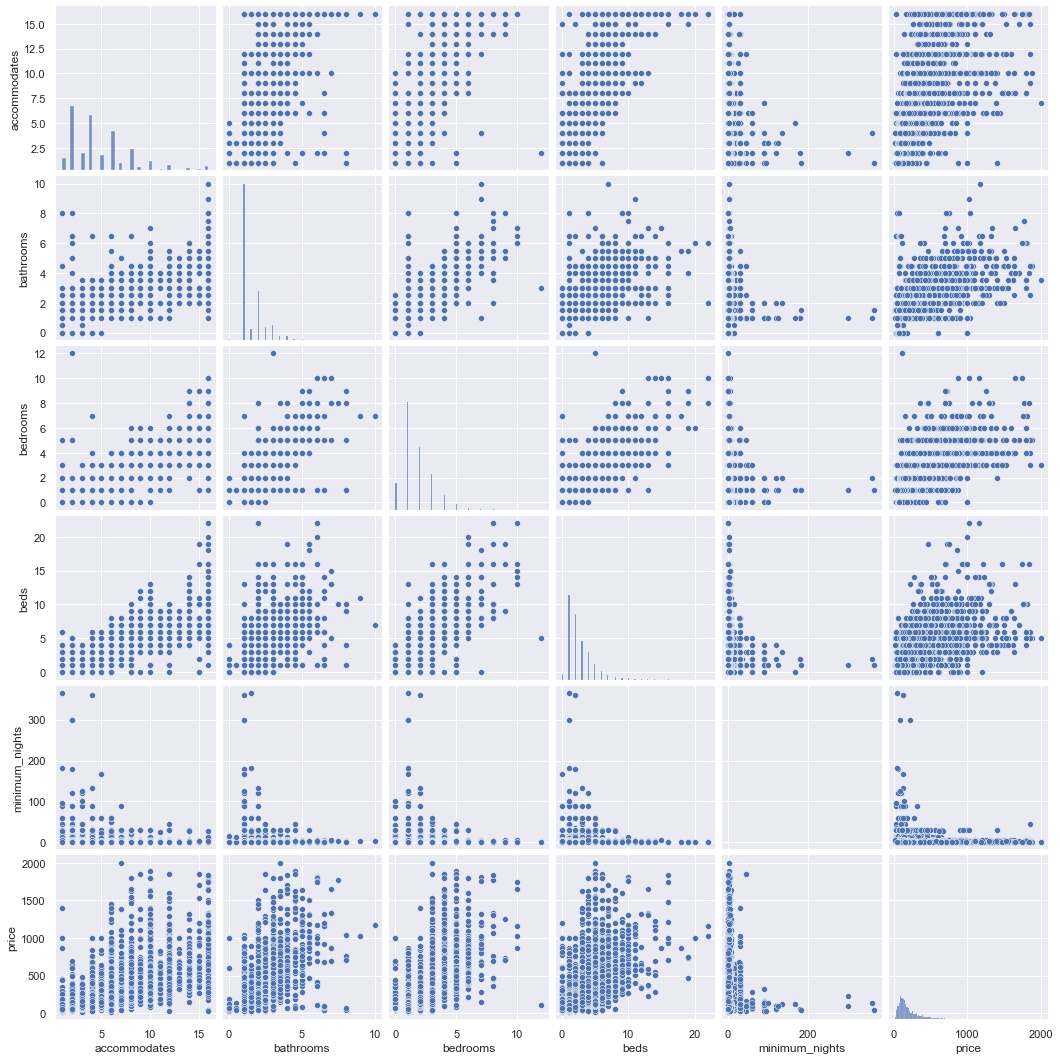

In [40]:
sns.pairplot(df_sd_m2, vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'price'])
plt.scatter
plt.show()
#check the relation again 

In [41]:
df_sd_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            8472 non-null   int64  
 1   room_type                    8472 non-null   int64  
 2   accommodates                 8472 non-null   int64  
 3   bathrooms                    8472 non-null   float64
 4   bedrooms                     8472 non-null   float64
 5   beds                         8472 non-null   float64
 6   minimum_nights               8472 non-null   int64  
 7   number_of_reviews            8472 non-null   int64  
 8   review_scores_rating         8472 non-null   float64
 9   review_scores_accuracy       8472 non-null   float64
 10  review_scores_cleanliness    8472 non-null   float64
 11  review_scores_checkin        8472 non-null   float64
 12  review_scores_communication  8472 non-null   float64
 13  review_scores_loca

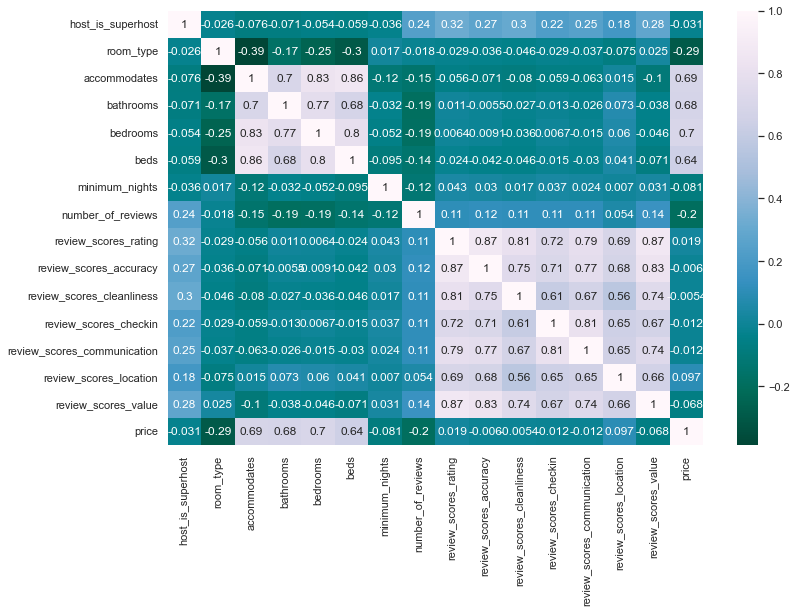

In [42]:
plt.figure(figsize = (12,8))

sns.heatmap(df_sd_m2.corr(), cmap = "PuBuGn_r", annot=True)
plt.show()
#heatmap for correlation

In [43]:
df_sd_m2.describe()
#summary statistics for all features

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.00000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000
mean,0.488787,0.344783,4.853754,1.553529,1.749056,2.608829,5.217304,62.282932,4.749269,4.794313,4.75089,4.866537,4.855418,4.840068,4.685444,234.496813
std,0.499904,0.768115,3.115375,0.898455,1.282470,2.017327,12.024612,86.924493,0.367585,0.356054,0.36674,0.310237,0.319152,0.302651,0.386295,217.218869
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,18.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8.000000,4.670000,4.750000,4.67000,4.860000,4.840000,4.810000,4.610000,105.000000
50%,0.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2.000000,27.000000,4.850000,4.900000,4.86000,4.950000,4.950000,4.920000,4.780000,161.000000
75%,1.000000,0.000000,6.000000,2.000000,2.000000,3.000000,3.000000,81.000000,4.960000,4.990000,4.97000,5.000000,5.000000,5.000000,4.890000,284.000000
max,1.000000,3.000000,16.000000,10.000000,12.000000,22.000000,365.000000,845.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,1999.000000


In [44]:
df_sd_m2.to_csv('sd_data_cleaned.csv')
#export the dataset after cleaning

In [45]:
#data spliting and modeling
X = df_sd_m2.drop('price', axis=1)#.values
y = df_sd_m2.price.values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=304)

In [46]:
#simple linear regression
lm_1= LinearRegression()
lm_1.fit(X_train, y_train)
test_pred_1 = lm_1.predict(X_test)

In [47]:
coe_1 =pd.DataFrame(lm_1.coef_, X.columns)#get coefficients of the model
coe_1.columns = ['coefficients']
coe_1

,coefficients
host_is_superhost,9.953432
room_type,-24.367448
accommodates,16.095277
bathrooms,70.238194
bedrooms,36.090728
beds,1.222535
minimum_nights,-0.811589
number_of_reviews,-0.187633
review_scores_rating,63.143386
review_scores_accuracy,-2.068305


In [48]:
print('MAE:', round(metrics.mean_absolute_error(y_test, test_pred_1), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred_1), 3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_pred_1)), 3))
print('R2:', round(r2_score(y_test, test_pred_1), 4))
#different evaluated values for the model

MAE: 80.326
MSE: 18461.383
RMSE: 135.873
R2: 0.6057


In [49]:
#according to the correlation above we will try to drop two review columns

In [50]:
lm_5 = LinearRegression()

#Try drop two features first
X_s2 = X.drop(['review_scores_accuracy','review_scores_cleanliness'], axis=1)

#try drop three features
#X_s2 = X.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_communication'], axis=1)
#drop three features

X_train_2, X_test_2, y_train, y_test = train_test_split(X_s2, y, test_size=0.3, random_state=304)
#split data to train and test
lm_5.fit(X_train_2, y_train)
test_pred_3 = lm_5.predict(X_test_2)#fit again

In [51]:
X_s2.shape

(8472, 13)

In [52]:
print('MAE:', round(metrics.mean_absolute_error(y_test, test_pred_3), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred_3), 3))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, test_pred_3)), 3))
print('R2:', round(r2_score(y_test, test_pred_3), 5))

MAE: 80.378
MSE: 18429.288
RMSE: 135.755
R2: 0.6064


In [53]:
coe_2 =pd.DataFrame(lm_5.coef_, X_s2.columns) 
coe_2.columns = ['coefficients']
coe_2
#coefficient for new model

,coefficients
host_is_superhost,11.051873
room_type,-25.054886
accommodates,15.895915
bathrooms,70.314315
bedrooms,35.822261
beds,1.419900
minimum_nights,-0.830032
number_of_reviews,-0.189172
review_scores_rating,80.475445
review_scores_checkin,-34.682439


In [54]:
lm_5.intercept_#intercept value

-122.55834362820082

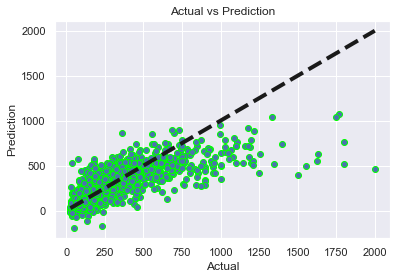

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_pred_3, edgecolors=(0, 1, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_title('Actual vs Prediction')
ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
plt.show()
#visualiztion for performance of dataset

In [56]:
X2 = sm.add_constant(X_s2)
est = sm.OLS(y, X2)#fit again for all data exmaples
est2 = est.fit()
print(est2.summary())#summary of the model and significant value

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     921.3
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:33:25   Log-Likelihood:                -53871.
No. Observations:                8472   AIC:                         1.078e+05
Df Residuals:                    8458   BIC:                         1.079e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
#consider rfe for feature selection
r2_list = []
num_pre = []
mse_list = []

for i in range(1,16):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=304)
    lm_4 = LinearRegression()
    lm_4.fit(X_train,y_train)
    rfe = RFE(lm_4,i)
    rfe = rfe.fit(X_train, y_train)
    test_pred_4 = rfe.predict(X_test)
    r2 = r2_score(y_test, test_pred_4)
    mse = mean_squared_error(y_test, test_pred_4)
    r2_list.append(r2)
    num_pre.append(i)
    mse_list.append(mse)
    #list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#X_test_rfe = rfe.transform(X_test)
#lm_4.fit(X_train_rfe,y_train)
#print(lm_4.score(X_test_rfe,y_test))
#print(selector.support_)
#print(selector.ranking_)
#print(X.columns[selector.support_])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_featur

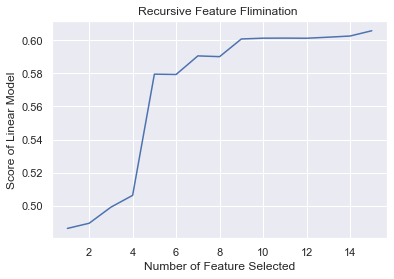

[0.4863706100239572, 0.48948629628625495, 0.4991934664650405, 0.5063364619040469, 0.5794984176204011, 0.5793112587049722, 0.5905264121635614, 0.5900729437168888, 0.6007431789120798, 0.6012211315236542, 0.6012690656666784, 0.6011850486033284, 0.6018177178066197, 0.6025202561846954, 0.6057102279226447]


In [58]:

# evaluate the model on test set
plt.plot(num_pre,r2_list)
plt.title('Recursive Feature Flimination ')
plt.xlabel('Number of Feature Selected')
plt.ylabel('Score of Linear Model')
plt.show()
print(r2_list)
#score for different numbers of featrues selected

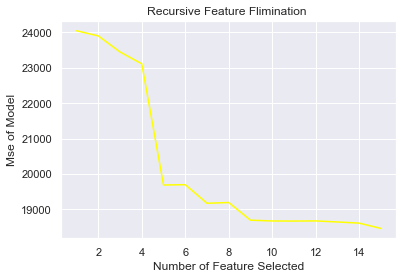

[24049.086863579636, 23903.204616527622, 23448.696787760167, 23114.248407018502, 19688.669064267033, 19697.43219406895, 19172.31777309206, 19193.55001228388, 18693.94968163313, 18671.571048134447, 18669.326682076317, 18673.2605178224, 18643.637764680156, 18610.74360634523, 18461.38317464975]


In [59]:
plt.plot(num_pre,mse_list, color = 'yellow' )
plt.title('Recursive Feature Flimination ')
plt.xlabel('Number of Feature Selected')
plt.ylabel('Mse of Model')
plt.show()
print(mse_list)
#MSE for different numbers of featrues selected

In [60]:
X_s3 = X[['host_is_superhost', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin']]

X_train_5, X_test_5, y_train, y_test = train_test_split(X_s3, y, test_size=0.3, random_state=304)

lm_fw = LinearRegression()
lm_fw.fit(X_train_5,y_train)
y_pred_fw = lm_fw.predict(X_test_5)
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_fw), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_fw), 3))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_fw)), 3))
print('R2:', round(r2_score(y_test, y_pred_fw), 4))

MAE: 81.956
MSE: 18967.329
RMSE: 137.722
R2: 0.5949


In [61]:
#try polynomial
dg = []
mse_list2 = []
r2_list2 =[]
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=304)

    polyTransform = PolynomialFeatures(degree=i)
    xTrainTransform = polyTransform.fit_transform(X_train)
    xTestTransform = polyTransform.fit_transform(X_test)
    lm_5 = LinearRegression()
    lm_5.fit(xTrainTransform, y_train)
    tr_pred = lm_5.predict(xTrainTransform)
    test_pred_5 = lm_5.predict(xTestTransform)
    mse_tr = mean_squared_error(y_train, tr_pred) #/ max(y)
    mse_te = mean_squared_error(y_test, test_pred_5) #/ max(y)
    r2_te = r2_score(y_test, test_pred_5)
    dg.append(i)
    mse_list2.append(mse_te)
    r2_list2.append(r2_te)
    print('Degree {:02d}: Train: {:f}, Test: {:f}, R2: {:f}'.format(i, mse_tr, mse_te, r2_te))

Degree 01: Train: 20000.384863, Test: 18461.383175, R2: 0.605710
Degree 02: Train: 17312.941842, Test: 17531.288888, R2: 0.625575
Degree 03: Train: 12189.253073, Test: 270555.349678, R2: -4.778397
Degree 04: Train: 3809.023530, Test: 16736384199.337420, R2: -357447.033494


In [62]:
#try polynomial with less predictors

mse_list3 = []
r2_list3 =[]
for i in range(1,5):
    X_train_5, X_test_5, y_train, y_test = train_test_split(X_s3, y, test_size=0.3, random_state=304)

    polyTransform2 = PolynomialFeatures(degree=i)
    xTrainTransform2 = polyTransform2.fit_transform(X_train_5)
    xTestTransform2 = polyTransform2.fit_transform(X_test_5)
    lm_6 = LinearRegression()
    lm_6.fit(xTrainTransform2, y_train)
    tr_pred_1 = lm_6.predict(xTrainTransform2)
    test_pred_6 = lm_6.predict(xTestTransform2)
    mse_tr_1 = mean_squared_error(y_train, tr_pred_1) #/ max(y)
    mse_te_1 = mean_squared_error(y_test, test_pred_6) #/ max(y)
    r2_te_1 = r2_score(y_test, test_pred_6)
    mse_list3.append(mse_te_1)
    r2_list3.append(r2_te_1)
    print('Degree {:02d}: Train: {:f}, Test: {:f}, R2: {:f}'.format(i, mse_tr_1, mse_te_1, r2_te_1))

Degree 01: Train: 20440.040444, Test: 18967.328940, R2: 0.594904
Degree 02: Train: 18261.213603, Test: 17975.774519, R2: 0.616082
Degree 03: Train: 14886.401321, Test: 44627.555385, R2: 0.046865
Degree 04: Train: 9399.864182, Test: 745490726.027038, R2: -15920.849716


In [63]:
#Use Cross Validation

#First Try simple multiLinear
lm_7 = LinearRegression()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=304)

np.mean(cross_val_score(lm_7, X, y, cv=5))


0.5810067251706014

In [64]:
#try after modelselection
X_train_4, X_test_4, y_train, y_test = train_test_split(X_s2, y, test_size=0.3, random_state=304)
# np.mean(cross_val_score(lm_7, X_s2, y, cv=5))
lm_8 = LinearRegression()

#cve=cross_validate(lm_8,X_s2,y,scoring='neg_mean_squared_error',cv=5,return_estimator= True)
y_pred = cross_val_predict(lm_8, X, y, cv=5)


In [65]:
np.mean(cross_val_score(lm_8, X_s2, y, cv=5))

0.58072896916494

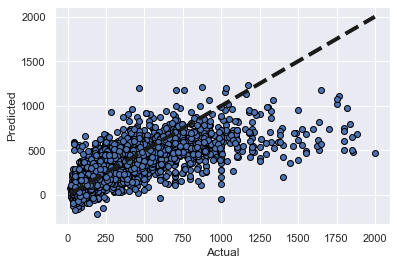

In [66]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()